In [42]:
# Import libs
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


In [43]:
# Images folder
output_dir = '../images'

In [44]:
# Dataset read
data = pd.read_csv('../data/AmesHousing.csv')

In [45]:
# encoding dataset categorycal to numeric
data_encoded = pd.get_dummies(data, drop_first=True)

In [46]:
# Corr Matrix
correlation_matrix = data_encoded.corr()

# Filter columns related with SalePrice (abs value > 0.5)
saleprice_corr = correlation_matrix['SalePrice'].abs()  # using abs to take positive and negative relation
significant_corr_columns = saleprice_corr[saleprice_corr > 0.5].index

# Columns name with a strong relation (>=0.5)
print("Columns with salesprice strong relation (>|0.5|):")
print(significant_corr_columns)

Columns with salesprice strong relation (>|0.5|):
Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'SalePrice',
       'Exter Qual_TA', 'Foundation_PConc', 'Kitchen Qual_TA'],
      dtype='object')


In [47]:
# Dataframe with encode data
features = significant_corr_columns.drop('SalePrice')  # removing 'SalePrice' from features
X = data_encoded[features]  # predict variables
y = data_encoded['SalePrice']  # target variable


In [55]:
# Split dataset training (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Size of training dataset: {X_train.shape}')
print(f'Size of test dataset: {X_test.shape}')


Size of training dataset: (2344, 14)
Size of test dataset: (586, 14)


In [50]:
# Init Scaler
scaler = StandardScaler()

# Setting the scaler to both dataset, training and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [56]:
# Check for NaN values
print("Training data NaNs in features:", np.isnan(X_train_scaled).sum())
print("Test data NaNs in features:", np.isnan(X_test_scaled).sum())
print("Training data NaNs in target:", np.isnan(y_train).sum())
print("Test data NaNs in target:", np.isnan(y_test).sum())

Training data NaNs in features: 144
Test data NaNs in features: 41
Training data NaNs in target: 0
Test data NaNs in target: 0


In [57]:
from sklearn.impute import SimpleImputer

# Imputer for numerical values
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

In [60]:
# Saving results
np.save('X_train_scaled.npy', X_train_scaled)
np.save('X_test_scaled.npy', X_test_scaled)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)
np.save('feature_names.npy', features)

In [52]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features)

print(X_train_scaled_df.head())
print(X_test_scaled_df.head())

   Overall Qual  Year Built  Year Remod/Add  Mas Vnr Area  Total Bsmt SF  \
0      0.673941    0.181084       -0.381277      0.525314       0.098466   
1     -0.766750   -0.115603       -0.814347     -0.572233      -0.077948   
2     -1.487095   -0.280430       -1.054941     -0.572233      -2.398819   
3     -1.487095   -0.708978       -1.632368     -0.572233      -2.398819   
4     -1.487095   -1.664971       -1.632368     -0.572233      -1.024167   

   1st Flr SF  Gr Liv Area  Full Bath  Garage Yr Blt  Garage Cars  \
0    0.558877    -0.243522    0.80217      -0.054465     0.339139   
1    0.013468     1.254956    0.80217      -0.405023     0.339139   
2    0.179688    -0.532910    0.80217      -0.599778     0.339139   
3   -0.298194    -0.897619    0.80217      -0.833483     0.339139   
4   -0.139766     0.412558    0.80217            NaN    -2.340801   

   Garage Area  Exter Qual_TA  Foundation_PConc  Kitchen Qual_TA  
0     0.046712       0.777419         -0.876198         0.956

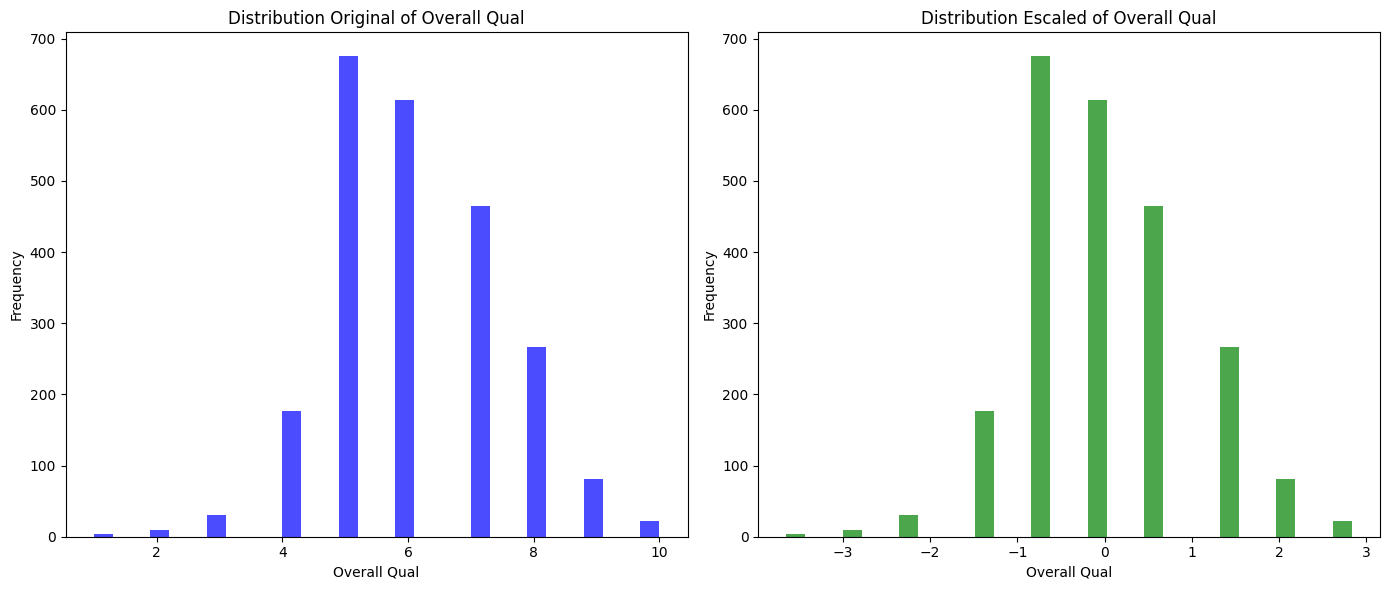

In [53]:
# Comparare original and  scaled
feature = features[0]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(X_train[feature], bins=30, alpha=0.7, color='blue')
plt.title(f'Distribution Original of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(X_train_scaled_df[feature], bins=30, alpha=0.7, color='green')
plt.title(f'Distribution Escaled of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.savefig(os.path.join(output_dir, 'original_vs_scaled.png'))
plt.tight_layout()
plt.show()